In [ ]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

# TODO: Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment1/'
FOLDERNAME = 'Stu/stan/CS231N/project'
FOLDERNAME1 = 'Stu/stan/CS231N/project/siamese-pytorch-master/siamese-pytorch-master'
%cd /content/drive/My\ Drive/$FOLDERNAME1/
%cd /content/drive/My\ Drive/$FOLDERNAME1/omniglot-master/python

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Stu/stan/CS231N/project/siamese-pytorch-master/siamese-pytorch-master
/content/drive/My Drive/Stu/stan/CS231N/project/siamese-pytorch-master/siamese-pytorch-master/omniglot-master/python


In [ ]:
#!git clone https://github.com/brendenlake/omniglot.git

#!unzip images_evaluation.zip
#!unzip images_background.zip
#%cd ../..
## setup directory for saving models
#%mkdir models
!pip install python-gflags
#!pip3 install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/torch_stable.html

In [ ]:
import torch
x = torch.rand(5, 3)
print(x)
import torch
torch.cuda.is_available()

tensor([[0.6431, 0.2980, 0.2942],
        [0.5967, 0.8423, 0.5047],
        [0.1636, 0.4040, 0.2975],
        [0.7927, 0.1665, 0.6813],
        [0.5122, 0.8912, 0.5631]])


True

In [ ]:
print("hello")
!pip install torch
!pip install torchvision
#!conda install pytorch torchvision cudatoolkit=10.0 -c pytorch



hello


In [ ]:
!cd C:\Users\vixpa\Downloads\prj
print("hello")
!C:\Users\vixpa\AppData\Local\Programs\Python\Python39\python C:\Users\vixpa\Downloads\prj\train.py --train_path C:\Users\vixpa\Downloads\prj\aug\train \
                 --test_path  C:\Users\vixpa\Downloads\prj\aug\test \
                 --gpu_ids 0 \
                 --model_path C:\Users\vixpa\Downloads\prj\models

hello
^C


In [ ]:
%cd /content/drive/My\ Drive/$FOLDERNAME1
print("hello")
!python3 train.py --train_path aug/train \
                 --test_path  aug/test \
                 --gpu_ids 0 \
                 --model_path models

[WinError 3] The system cannot find the path specified: '/content/drive/My\\ Drive/$FOLDERNAME1'
C:\Users\vixpa\Downloads\prj\segment
hello


Python was not found; run without arguments to install from the Microsoft Store, or disable this shortcut from Settings > Manage App Execution Aliases.


In [ ]:
#cd C:\Users\vixpa\Downloads\prj
%cd /content/drive/My\ Drive/$FOLDERNAME1
%pwd
!dir
!python test.py
!python --version

/content/drive/My Drive/Stu/stan/CS231N/project/siamese-pytorch-master/siamese-pytorch-master
aug   loss.png	       models		prj.ipynb    requirements.txt
aug2  make_dataset.py  mydataset.py	__pycache__  test.py
aug3  model.py	       omniglot-master	readme.md    train.py
Traceback (most recent call last):
  File "test.py", line 28, in <module>
    model.load_state_dict(torch.load('models/model-inter-19101.pt', map_location=torch.device('cpu')))
  File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 1224, in load_state_dict
    self.__class__.__name__, "\n\t".join(error_msgs)))
RuntimeError: Error(s) in loading state_dict for Siamese:
	size mismatch for conv.0.weight: copying a param with shape torch.Size([64, 1, 10, 10]) from checkpoint, the shape in current model is torch.Size([64, 3, 10, 10]).
Python 3.7.10


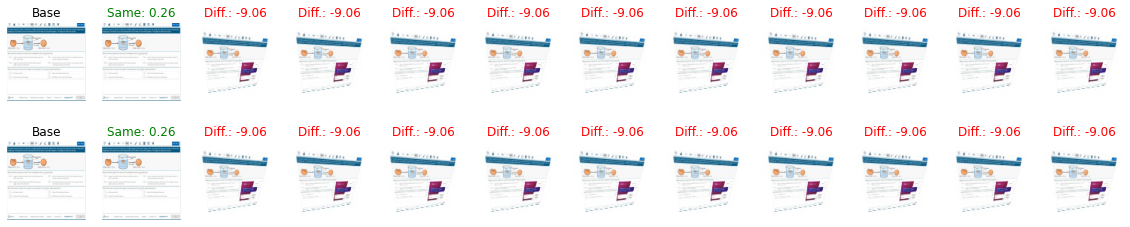

In [ ]:
#%cd C:\Users\vixpa\Downloads\prj
import torch
import pickle
import torchvision
from torchvision import transforms
import torchvision.datasets as dset
from torchvision import transforms
from mydataset import OmniglotTrain, OmniglotTest
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
from model import Siamese
import time
import numpy as np
import gflags
import sys
from collections import deque
import PIL
import random,os
from PIL import Image
from IPython.display import Image

from PIL import Image
from torchvision.transforms import ToTensor
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

model1 = Siamese()
#model1.load_state_dict(torch.load('model_detect/model-inter-8401.pt', map_location=torch.device('cpu')))
model1.load_state_dict(torch.load('models/model-detector.pt', map_location=torch.device('cpu')))
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
def get_concat_h(im1, im2):
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

rows = 2
cols = 12
axes=[]
fig=plt.figure()

#for a in range(rows*cols):
#    b = np.random.randint(7, size=(height,width))
#    axes.append( fig.add_subplot(rows, cols, a+1) )
#    subplot_title=("Subplot"+str(a))
#    axes[-1].set_title(subplot_title)  
#    plt.imshow(b)
#fig.tight_layout()    
#plt.show()

for i in range(rows):
  c1 = random.choice(os.listdir("aug/valid")) #change dir name to whatever
  c2 = random.choice(os.listdir("aug/valid" + "/" +c1)) #change dir name to whatever
  c31 = random.choice(os.listdir("aug/valid" + "/" +c1 + "/" +c2)) #change dir name to whatever
  #print(c1, c2, c3)
  image1 = Image.open("aug/valid" + "/" +c1 + "/" +c2+ "/" +c31)
  img1 = ToTensor()(image1).unsqueeze(0) # unsqueeze to add artificial first dimension
  var_image1 = Variable(img1)

  c32 = random.choice(os.listdir("aug/valid" + "/" +c1 + "/" +c2)) #change dir name to whatever
  #print(c1, c2, c3)
  image2 = Image.open("aug/valid" + "/" +c1 + "/" +c2+ "/" +c32)
  img2 = ToTensor()(image2).unsqueeze(0) # unsqueeze to add artificial first dimension
  var_image2 = Variable(img2)

  #var_image1.requires_grad_()
  #var_image2.requires_grad_()

  output = model1.forward(var_image1, var_image2).data.cpu().numpy()
  #scores.backward(torch.ones(y.shape))

  #comb = get_concat_h(image1, image2)
  plt.subplot(rows, cols, i*cols+1)
  plt.imshow(np.asarray(image1))
  plt.axis('off')
  plt.title("Base")

  plt.subplot(rows, cols, i*cols+2)
  plt.imshow(np.asarray(image2))
  plt.axis('off')
  plt.title("Same: " + str(round(output[0,0],2)), color='g')

  #print(c31, c32, output)

  #c1 = random.choice(os.listdir("aug/valid")) #change dir name to whatever
  #c2 = random.choice(os.listdir("aug/valid" + "/" +c1)) #change dir name to whatever
  #c31 = random.choice(os.listdir("aug/valid" + "/" +c1 + "/" +c2)) #change dir name to whatever
  #print(c1, c2, c3)
  #image1 = Image.open("aug/valid" + "/" +c1 + "/" +c2+ "/" +c31)
  #img1 = ToTensor()(image1).unsqueeze(0) # unsqueeze to add artificial first dimension
  #var_image1 = Variable(img1)
  for j in range(cols-2):
    c1 = random.choice(os.listdir("aug/valid")) #change dir name to whatever
    c2 = random.choice(os.listdir("aug/valid" + "/" +c1)) #change dir name to whatever
    c1="set_0"
    c2="1_exam_7"
    c32 = random.choice(os.listdir("aug/valid" + "/" +c1 + "/" +c2)) #change dir name to whatever
    #print(c1, c2, c3)
    image2 = Image.open("aug/valid" + "/" +c1 + "/" +c2+ "/" +"pic.jpg")
    img2 = ToTensor()(image2).unsqueeze(0) # unsqueeze to add artificial first dimension
    var_image2 = Variable(img2)

    output = model1.forward(var_image1, var_image2).data.cpu().numpy()
    #comb = get_concat_h(image1, image2)
    plt.subplot(rows, cols, i*cols+j+3)
    plt.imshow(np.asarray(image2))
    plt.axis('off')
    plt.title("Diff.: " + str(round(output[0,0],2)), color='red')
    #plt.title(f"{bcolors.WARNING}Warning: No active frommets remain. Continue?{bcolors.ENDC}")

  #print(c31, c32, output)

#fig.tight_layout() 
plt.axis('off')

fig.set_figwidth(20)
fig.set_figheight(rows*2)
plt.show()

In [ ]:
import torch
import pickle
import torchvision
from torchvision import transforms
import torchvision.datasets as dset
from torchvision import transforms
from mydataset import OmniglotTrain, OmniglotTest
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
from model import Siamese
import time
import numpy as np
import gflags
import sys

from collections import deque
import PIL
import random,os
from PIL import Image
from IPython.display import Image

from PIL import Image
from torchvision.transforms import ToTensor
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

sal_dir ='aug/test'

model = Siamese()
model.load_state_dict(torch.load('models/model-detector.pt', map_location=torch.device('cpu')))
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
def get_concat_h(im1, im2, s1, s2):
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    s11 = Image.fromarray(np.uint8(cm.gist_earth(s1)*255))
    #Image.blend(im1, s1, 0.5)
    dst.paste(im1, (0, 0))
    #dst.paste(s1, (0,0))
    dst.paste(im2, (im1.width, 0))
    return dst

rows = 20
cols = 4
axes=[]
fig=plt.figure()

#for a in range(rows*cols):
#    b = np.random.randint(7, size=(height,width))
#    axes.append( fig.add_subplot(rows, cols, a+1) )
#    subplot_title=("Subplot"+str(a))
#    axes[-1].set_title(subplot_title)  
#    plt.imshow(b)
#fig.tight_layout()    
#plt.show()

for i in range(rows):
  c1 = random.choice(os.listdir(sal_dir)) #change dir name to whatever
  c2 = random.choice(os.listdir(sal_dir + "/" +c1)) #change dir name to whatever
  c31 = random.choice(os.listdir(sal_dir + "/" +c1 + "/" +c2)) #change dir name to whatever
  #print(c1, c2, c3)
  image1 = Image.open(sal_dir + "/" +c1 + "/" +c2+ "/" +c31)
  img1 = ToTensor()(image1).unsqueeze(0) # unsqueeze to add artificial first dimension
  var_image1 = Variable(img1)

  c32 = random.choice(os.listdir(sal_dir + "/" +c1 + "/" +c2)) #change dir name to whatever
  #print(c1, c2, c3)
  image2 = Image.open(sal_dir + "/" +c1 + "/" +c2+ "/" +c32)
  img2 = ToTensor()(image2).unsqueeze(0) # unsqueeze to add artificial first dimension
  var_image2 = Variable(img2)

  var_image1.requires_grad_()
  var_image2.requires_grad_()

  output = model.forward(var_image1, var_image2)#.data.cpu().numpy()
  output.backward(output*torch.ones((1,1)))
  saliency1 = var_image1.grad.data.abs()
  saliency2 = var_image2.grad.data.abs()
  saliency1, _ = torch.max(saliency1, dim=1)
  saliency1 = saliency1.squeeze()
  saliency2, _ = torch.max(saliency2, dim=1)
  saliency2 = saliency2.squeeze()


  #saliency1 = saliency1.numpy()
  #print(np.histogram(saliency1), np.max(saliency1))
  #print(saliency1.shape, var_image1.shape)
  #saliency1 = 255 * saliency1

  #imgnp = np.array(image1.copy())
  #plt.imshow(imgnp, cmap='gray')
  #plt.imshow(saliency1, cmap='Reds', alpha=0.5) 
  ##plt.imshow(saliency1, cmap=plt.cm.hot)
  #plt.axis('off')
  #plt.gcf().set_size_inches(12, 5)
  #plt.show()

  #comb = get_concat_h(image1, image2, saliency1, saliency2)
  plt.subplot(rows, cols, i*4+1)
  plt.imshow(np.asarray(image1), cmap='gray')
  plt.imshow(saliency1, cmap='Reds', alpha=0.7) 
  plt.axis('off')
  output = output.data.cpu().numpy()
  plt.title("Same: " + str(round(output[0,0],2)), color='g', fontsize=20)

  plt.subplot(rows, cols, i*4+2)
  plt.imshow(np.asarray(image2), cmap='gray')
  plt.imshow(saliency2, cmap='Reds', alpha=0.7) 
  #plt.imshow(saliency1, cmap='Reds', alpha=0.5) 
  plt.axis('off')
  print(c31, c32, output)
  #for j in (3):
  #c1 = random.choice(os.listdir("aug/valid")) #change dir name to whatever
  #c2 = random.choice(os.listdir("aug/valid" + "/" +c1)) #change dir name to whatever
  #c31 = random.choice(os.listdir("aug/valid" + "/" +c1 + "/" +c2)) #change dir name to whatever
  #print(c1, c2, c3)
  image1 = Image.open(sal_dir + "/" +c1 + "/" +c2+ "/" +c31)
  img1 = ToTensor()(image1).unsqueeze(0) # unsqueeze to add artificial first dimension
  var_image1 = Variable(img1)

  c1 = random.choice(os.listdir(sal_dir)) #change dir name to whatever
  c2 = random.choice(os.listdir(sal_dir + "/" +c1)) #change dir name to whatever
  c32 = random.choice(os.listdir(sal_dir + "/" +c1 + "/" +c2)) #change dir name to whatever
  #print(c1, c2, c3)
  image2 = Image.open(sal_dir + "/" +c1 + "/" +c2+ "/" +c32)
  img2 = ToTensor()(image2).unsqueeze(0) # unsqueeze to add artificial first dimension
  var_image2 = Variable(img2)

  var_image1.requires_grad_()
  var_image2.requires_grad_()


  output = model.forward(var_image1, var_image2)#.data.cpu().numpy()
  output.backward(output*torch.ones((1,1)))
  saliency1 = var_image1.grad.data.abs()
  saliency2 = var_image2.grad.data.abs()
  saliency1, _ = torch.max(saliency1, dim=1)
  saliency1 = saliency1.squeeze()
  saliency2, _ = torch.max(saliency2, dim=1)
  saliency2 = saliency2.squeeze()

  #comb = get_concat_h(image1, image2, saliency1, saliency2)
  plt.subplot(rows, cols, i*4+3)
  plt.imshow(np.asarray(image1), cmap='gray')
  plt.imshow(saliency1, cmap='Reds', alpha=0.7) 
  plt.axis('off')
  output = output.data.cpu().numpy()
  #plt.title("Different: " + str(round(output[0,0],2)), color='red', fontsize=20)
  #plt.title(f"{bcolors.WARNING}Warning: No active frommets remain. Continue?{bcolors.ENDC}")

  plt.subplot(rows, cols, i*4+4)
  plt.imshow(np.asarray(image2), cmap='gray')
  plt.imshow(saliency2, cmap='Reds', alpha=0.7) 
  #plt.imshow(saliency1, cmap='Reds', alpha=0.5) 
  plt.axis('off')
  print(c31, c32, output)


  print(c31, c32, output)

fig.tight_layout() 
plt.axis('off')

fig.set_figwidth(10)
fig.set_figheight(rows*3)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#Regional discrepancy check

import torch
import pickle
import torchvision
from torchvision import transforms
import torchvision.datasets as dset
from torchvision import transforms
from mydataset import OmniglotTrain, OmniglotTest
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
from model import Siamese
import time
import numpy as np
import gflags
import sys
from collections import deque
import PIL
import random,os
from PIL import Image
from IPython.display import Image

from PIL import Image
from torchvision.transforms import ToTensor
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

model = Siamese()
model.load_state_dict(torch.load('models_col_rot_shrunk/model-inter-6501.pt', map_location=torch.device('cpu')))
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
def get_concat_h(im1, im2):
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

rows =8
cols = 11
axes=[]
fig=plt.figure()
root_path = "aug/valid"
#for a in range(rows*cols):
#    b = np.random.randint(7, size=(height,width))
#    axes.append( fig.add_subplot(rows, cols, a+1) )
#    subplot_title=("Subplot"+str(a))
#    axes[-1].set_title(subplot_title)  
#    plt.imshow(b)
#fig.tight_layout()    
#plt.show()

for i in range(rows):
  c1 = random.choice(os.listdir(root_path)) #change dir name to whatever
  c2 = random.choice(os.listdir(root_path + "/" +c1)) #change dir name to whatever
  #c31 = random.choice(os.listdir(root_path + "/" +c1 + "/" +c2)) #change dir name to whatever
  #print("base" + root_path + "/" +c1 + "/" +c2+ "/" +c2+"_0.jpg")
  image1 = Image.open(root_path + "/" +c1 + "/" +c2+ "/" +c2+"_0.jpg")
  img1 = ToTensor()(image1).unsqueeze(0) # unsqueeze to add artificial first dimension
  var_image1 = Variable(img1)
  #print(var_image1.shape)
  plt.subplot(rows, cols, i*cols+1)
  #print(i+1)
  plt.imshow(np.asarray(image1))
  plt.title("Base")
  plt.axis('off')

  for j in range(cols-1):

    #c32 = random.choice(os.listdir(root_path + "/" +c1 + "/" +c2)) #change dir name to whatever
    #print("test" + root_path + "/" +c1 + "/" +c2+ "/" +c2+"_" +str(j+1)+".jpg")
    #image2 = Image.open(root_path + "/" +c1 + "/" +c2+ "/" +c32)
    image2 = Image.open(root_path + "/" +c1 + "/" +c2+ "/" +c2+"_" +str(j)+".jpg")
    img2 = ToTensor()(image2).unsqueeze(0) # unsqueeze to add artificial first dimension
    var_image2 = Variable(img2)

    #var_image1.requires_grad_()
    #var_image2.requires_grad_()

    output = model.forward(var_image1, var_image2).data.cpu().numpy()
    #print(output.shape)
    o2 = model.forward_region(var_image1, var_image2).data.cpu().numpy().squeeze().sum(axis=0)

    #print(j, o2)
    #scores.backward(torch.ones(y.shape))

    comb = get_concat_h(image1, image2)
    #print((j+1)*(cols)+i+1)
    plt.subplot(rows, cols, (i)*(cols)+j+2)
    #plt.imshow(o2, cmap='hot', interpolation='nearest')
    plt.imshow(np.asarray(image2))
    plt.axis('off')
    plt.title(str(round(output[0,0],2)))
    #print(0, j, output)
    continue
    

    c1 = random.choice(os.listdir("aug/valid")) #change dir name to whatever
    c2 = random.choice(os.listdir("aug/valid" + "/" +c1)) #change dir name to whatever
    c31 = random.choice(os.listdir("aug/valid" + "/" +c1 + "/" +c2)) #change dir name to whatever
    #print(c1, c2, c3)
    image1 = Image.open(root_path + "/" +c1 + "/" +c2+ "/" +c31)
    img1 = ToTensor()(image1).unsqueeze(0) # unsqueeze to add artificial first dimension
    var_image1 = Variable(img1)

    c1 = random.choice(os.listdir(root_path)) #change dir name to whatever
    c2 = random.choice(os.listdir(root_path + "/" +c1)) #change dir name to whatever
    c32 = random.choice(os.listdir(root_path + "/" +c1 + "/" +c2)) #change dir name to whatever
    #print(c1, c2, c3)
    image2 = Image.open(root_path + "/" +c1 + "/" +c2+ "/" +c32)
    img2 = ToTensor()(image2).unsqueeze(0) # unsqueeze to add artificial first dimension
    var_image2 = Variable(img2)

    output = model.forward(var_image1, var_image2).data.cpu().numpy()
    comb = get_concat_h(image1, image2)
    plt.subplot(rows, cols, i*2+2)
    plt.imshow(np.asarray(comb))
    plt.axis('off')
    plt.title("Different: " + str(round(output[0,0],2)), color='red', fontsize=0)
    #plt.title(f"{bcolors.WARNING}Warning: No active frommets remain. Continue?{bcolors.ENDC}")

    print(c31, c32, output)

#fig.tight_layout() 
plt.axis('off')

fig.set_figwidth(20)
fig.set_figheight(rows*2)
plt.show()

RuntimeError: ignored

In [ ]:
%cd C:\Users\vixpa\Downloads\prj\segment
%pwd

C:\Users\vixpa\Downloads\prj\segment


'C:\\Users\\vixpa\\Downloads\\prj\\segment'

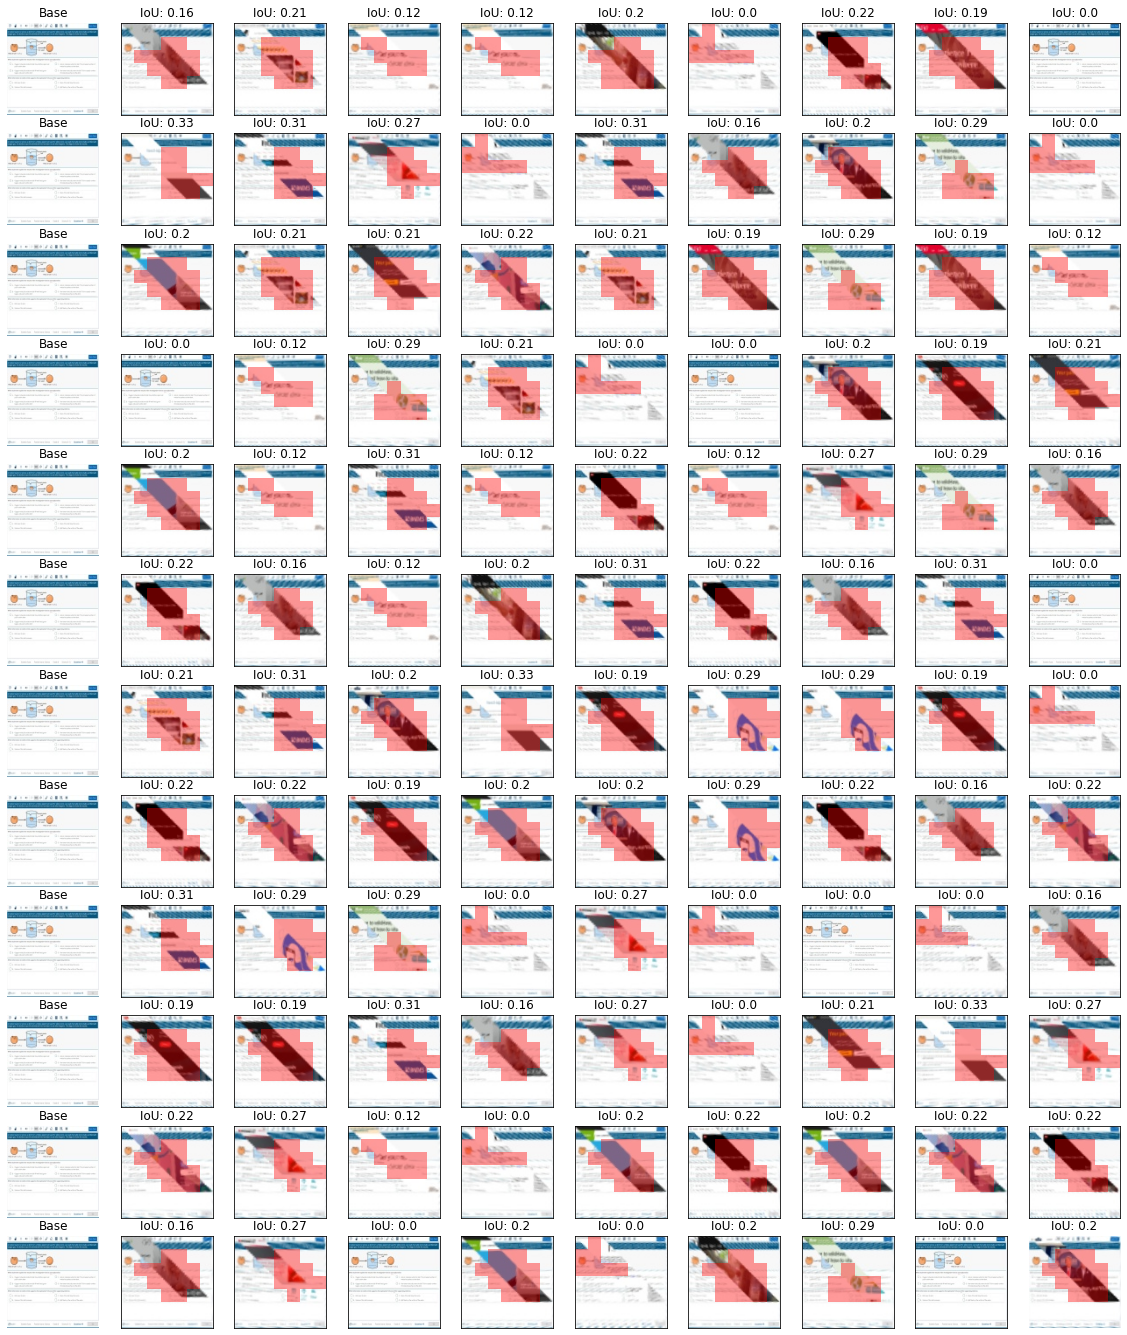

In [ ]:
#Regional discrepancy check

import torch
import pickle
import torchvision
from torchvision import transforms
import torchvision.datasets as dset
from torchvision import transforms
from mydataset import OmniglotTrain, OmniglotTest
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
from model import Siamese
import time
import numpy as np
import gflags
import sys
from collections import deque
import PIL
import random,os
from PIL import Image
from IPython.display import Image
from matplotlib.patches import Rectangle

from PIL import Image
from torchvision.transforms import ToTensor
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

model = Siamese()
model.load_state_dict(torch.load('model_localize_train/model-inter-28501.pt', map_location=torch.device('cpu')))
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
def get_concat_h(im1, im2):
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

rows =12
cols = 10
axes=[]
S=7
I=105
fig=plt.figure()
root_path = "aug/test_diag"
#for a in range(rows*cols):
#    b = np.random.randint(7, size=(height,width))
#    axes.append( fig.add_subplot(rows, cols, a+1) )
#    subplot_title=("Subplot"+str(a))
#    axes[-1].set_title(subplot_title)  
#    plt.imshow(b)
#fig.tight_layout()    
#plt.show()

for i in range(rows):
  c1 = random.choice(os.listdir(root_path)) #change dir name to whatever
  #print(c1)
  c2 = random.choice(os.listdir(root_path + "/" +c1)) #change dir name to whatever
  c1="set_0"
  c2="1_exam_7"
  #c31 = random.choice(os.listdir(root_path + "/" +c1 + "/" +c2)) #change dir name to whatever
  #print("base" + root_path + "/" +c1 + "/" +c2+ "/" +c2+"_0.jpg")
  image1 = Image.open(root_path + "/" +c1 + "/" +c2+ "/"+ "0_"  + c2+ ".jpg")
  img1 = ToTensor()(image1).unsqueeze(0) # unsqueeze to add artificial first dimension
  var_image1 = Variable(img1)
  #print(var_image1.shape)
  plt.subplot(rows, cols, i*cols+1)
  #print(i+1)
  plt.imshow(np.asarray(image1))
  plt.title("Base")
  plt.axis('off')

  for j in range(cols-1):
    c32 = "0_"  + c2 +".jpg"
    #while c32 == "0_"  + c2 +".jpg":
    c32 = random.choice(os.listdir(root_path + "/" +c1 + "/" +c2)) #change dir name to whatever
       #print(c32,c2)
    #print("test" + root_path + "/" +c1 + "/" +c2+ "/" +c2+"_" +str(j+1)+".jpg")
    #image2 = Image.open(root_path + "/" +c1 + "/" +c2+ "/" +c32)
    image2 = Image.open(root_path + "/" +c1 + "/" +c2+ "/" +c32)
    img2 = ToTensor()(image2).unsqueeze(0) # unsqueeze to add artificial first dimension
    var_image2 = Variable(img2)

    #var_image1.requires_grad_()
    #var_image2.requires_grad_()

    output = model.forward(var_image1, var_image2).data.cpu().numpy()
    #print(output.shape)
    o2 = model.forward_region(var_image1, var_image2).data.cpu().numpy().squeeze().sum(axis=0)

    #print(j, o2)
    #scores.backward(torch.ones(y.shape))

    comb = get_concat_h(image1, image2)
    #print((j+1)*(cols)+i+1)
    plt.subplot(rows, cols, (i)*(cols)+j+2)
    output  = output.squeeze()
    #print(output.shape)
    output = np.transpose(output)
    #output =[output>0]
    #print(c32,c2)
    a = c32.split('_')
    if(a[0]=="0"):
      xs =0
      xe=0
      ys=0
      ye=0
    else:
      xs = int(a[1])
      xe = int(a[2])
      ys = int(a[3])
      ye = int(a[4])
    xs=4
    xe=7
    ys=3
    ye=6
    ht= ye-ys
    wi =xe-xs
    r = np.zeros((S,S),dtype=np.float32)
    r[xs:xe, ys:ye] = 1.0
    #print(r, output)
    #plt.plot(r)
    #plt.plot(output<-0.1)
    plt.imshow(image2)
    currentAxis = plt.gca()
    #currentAxis.add_patch(Rectangle((xs*(I//S), ys*(I//S)), wi*(I//S), ht*(I//S), facecolor="green",alpha=0.4))
    output = output.transpose()
    union = 0
    inter =0
    for k in range(S):
      for l in range(S):
        if(output[k,l]<-0.1):
          currentAxis.add_patch(Rectangle((k*(I//S), l*(I//S)), (I//S), (I//S), facecolor="red",alpha=0.4))
          union += 1
        if output[k,l]<-0.1 and k>= xs and k<xe and l>=ys and l<ye:
          inter +=1
        
    union += (xe-xs)*(ye-ys) - inter
    if union == 0:
      iou = 1
    else:
      iou = inter/union
    #print(inter, union, xe, xs, ye , ys, iou)
    #plt.imshow(output<-0.1, cmap='Greens', interpolation='nearest')
    #plt.imshow(r, cmap='Reds', interpolation='nearest')
    plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
    plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off
    #plt.show()
    #plt.imshow(np.asarray(image2))
    #plt.axis('off')
    #plt.title("GT: ("+str(xs)+","+str(ys)+")<>("+str(xe)+", "+str(ye)+")" )
    plt.title("IoU: "+ str(np.round(iou,2)))
    #plt.title(str(round(output[0,0],2)))
    #print(0, j, output)
    continue
    

    c1 = random.choice(os.listdir("aug/test")) #change dir name to whatever
    c2 = random.choice(os.listdir("aug/test" + "/" +c1)) #change dir name to whatever
    c31 = random.choice(os.listdir("aug/test" + "/" +c1 + "/" +c2)) #change dir name to whatever
    #print(c1, c2, c3)
    image1 = Image.open(root_path + "/" +c1 + "/" +c2+ "/" +c31)
    img1 = ToTensor()(image1).unsqueeze(0) # unsqueeze to add artificial first dimension
    var_image1 = Variable(img1)

    c1 = random.choice(os.listdir(root_path)) #change dir name to whatever
    c2 = random.choice(os.listdir(root_path + "/" +c1)) #change dir name to whatever
    c32 = random.choice(os.listdir(root_path + "/" +c1 + "/" +c2)) #change dir name to whatever
    #print(c1, c2, c3)
    image2 = Image.open(root_path + "/" +c1 + "/" +c2+ "/" +c32)
    img2 = ToTensor()(image2).unsqueeze(0) # unsqueeze to add artificial first dimension
    var_image2 = Variable(img2)

    output = model.forward(var_image1, var_image2).data.cpu().numpy()
    comb = get_concat_h(image1, image2)
    plt.subplot(rows, cols, i*2+2)
    plt.imshow(np.asarray(comb))
    plt.axis('off')
    plt.title("Different: " + str(round(output[0,0],2)), color='red', fontsize=0)
    #plt.title(f"{bcolors.WARNING}Warning: No active frommets remain. Continue?{bcolors.ENDC}")

    print(c31, c32, output)

#fig.tight_layout() 
plt.axis('off')

fig.set_figwidth(20)
fig.set_figheight(rows*2)
plt.show()